# Main task

In [196]:
import numpy as np
import math as mt
from PIL import Image as im
from matplotlib import pyplot as plt
%matplotlib notebook
from __future__ import division

In [197]:
def gaussian(array, mu=0, sigma=1):
    tmp = np.exp(-(array-mu)**2/(2* sigma**2))
    return tmp/tmp.sum()
normalize = lambda x: x/x.sum()


def bilateral(image, kernel_size, rho, sigma):
    max_offset = kernel_size //2
    #new_image = np.empty((image.shape[0]-kernel_size//2, image.shape[1]- kernel_size // 2))
    new_image = np.empty(image.shape)
    new_image[:, :]= np.nan

    smoothing_kernel = np.empty((kernel_size, kernel_size))
    for y in range(kernel_size):
        for x in range(kernel_size):
            smoothing_kernel[y, x] = (abs(x- kernel_size//2)**2 + abs(y- kernel_size//2)**2)**0.5

    for y in xrange(max_offset, image.shape[0]- max_offset):
        for x in xrange(max_offset, image.shape[1]- max_offset):
            new_image[y, x] = (
                normalize(
                    gaussian(
                        image[y-max_offset:y+max_offset+1,x-max_offset:x+max_offset+1] - image[y, x]
                            , 0, rho) *
                          gaussian(smoothing_kernel, 0, sigma))* 
                    image[y-max_offset:y+max_offset+1,x-max_offset:x+max_offset+1]
                                ).sum()
    return new_image

In [198]:
image_name = 'bauckhage.jpg'
raw_image = im.open("../img/"+ image_name)
image = np.array(raw_image, dtype=np.float32)

In [199]:
rhos =   [10, 50, 100, 1000]
sigmas = [1, 5, 10]
#new_images = [[None] * len(sigmas)] * len(rhos)
new_images = {}
for i in range(len(rhos)):
    for j in range(len(sigmas)):
        new_images[(i,j)] = bilateral(image, 15, rhos[i], sigmas[j])

<IPython.core.display.Javascript object>


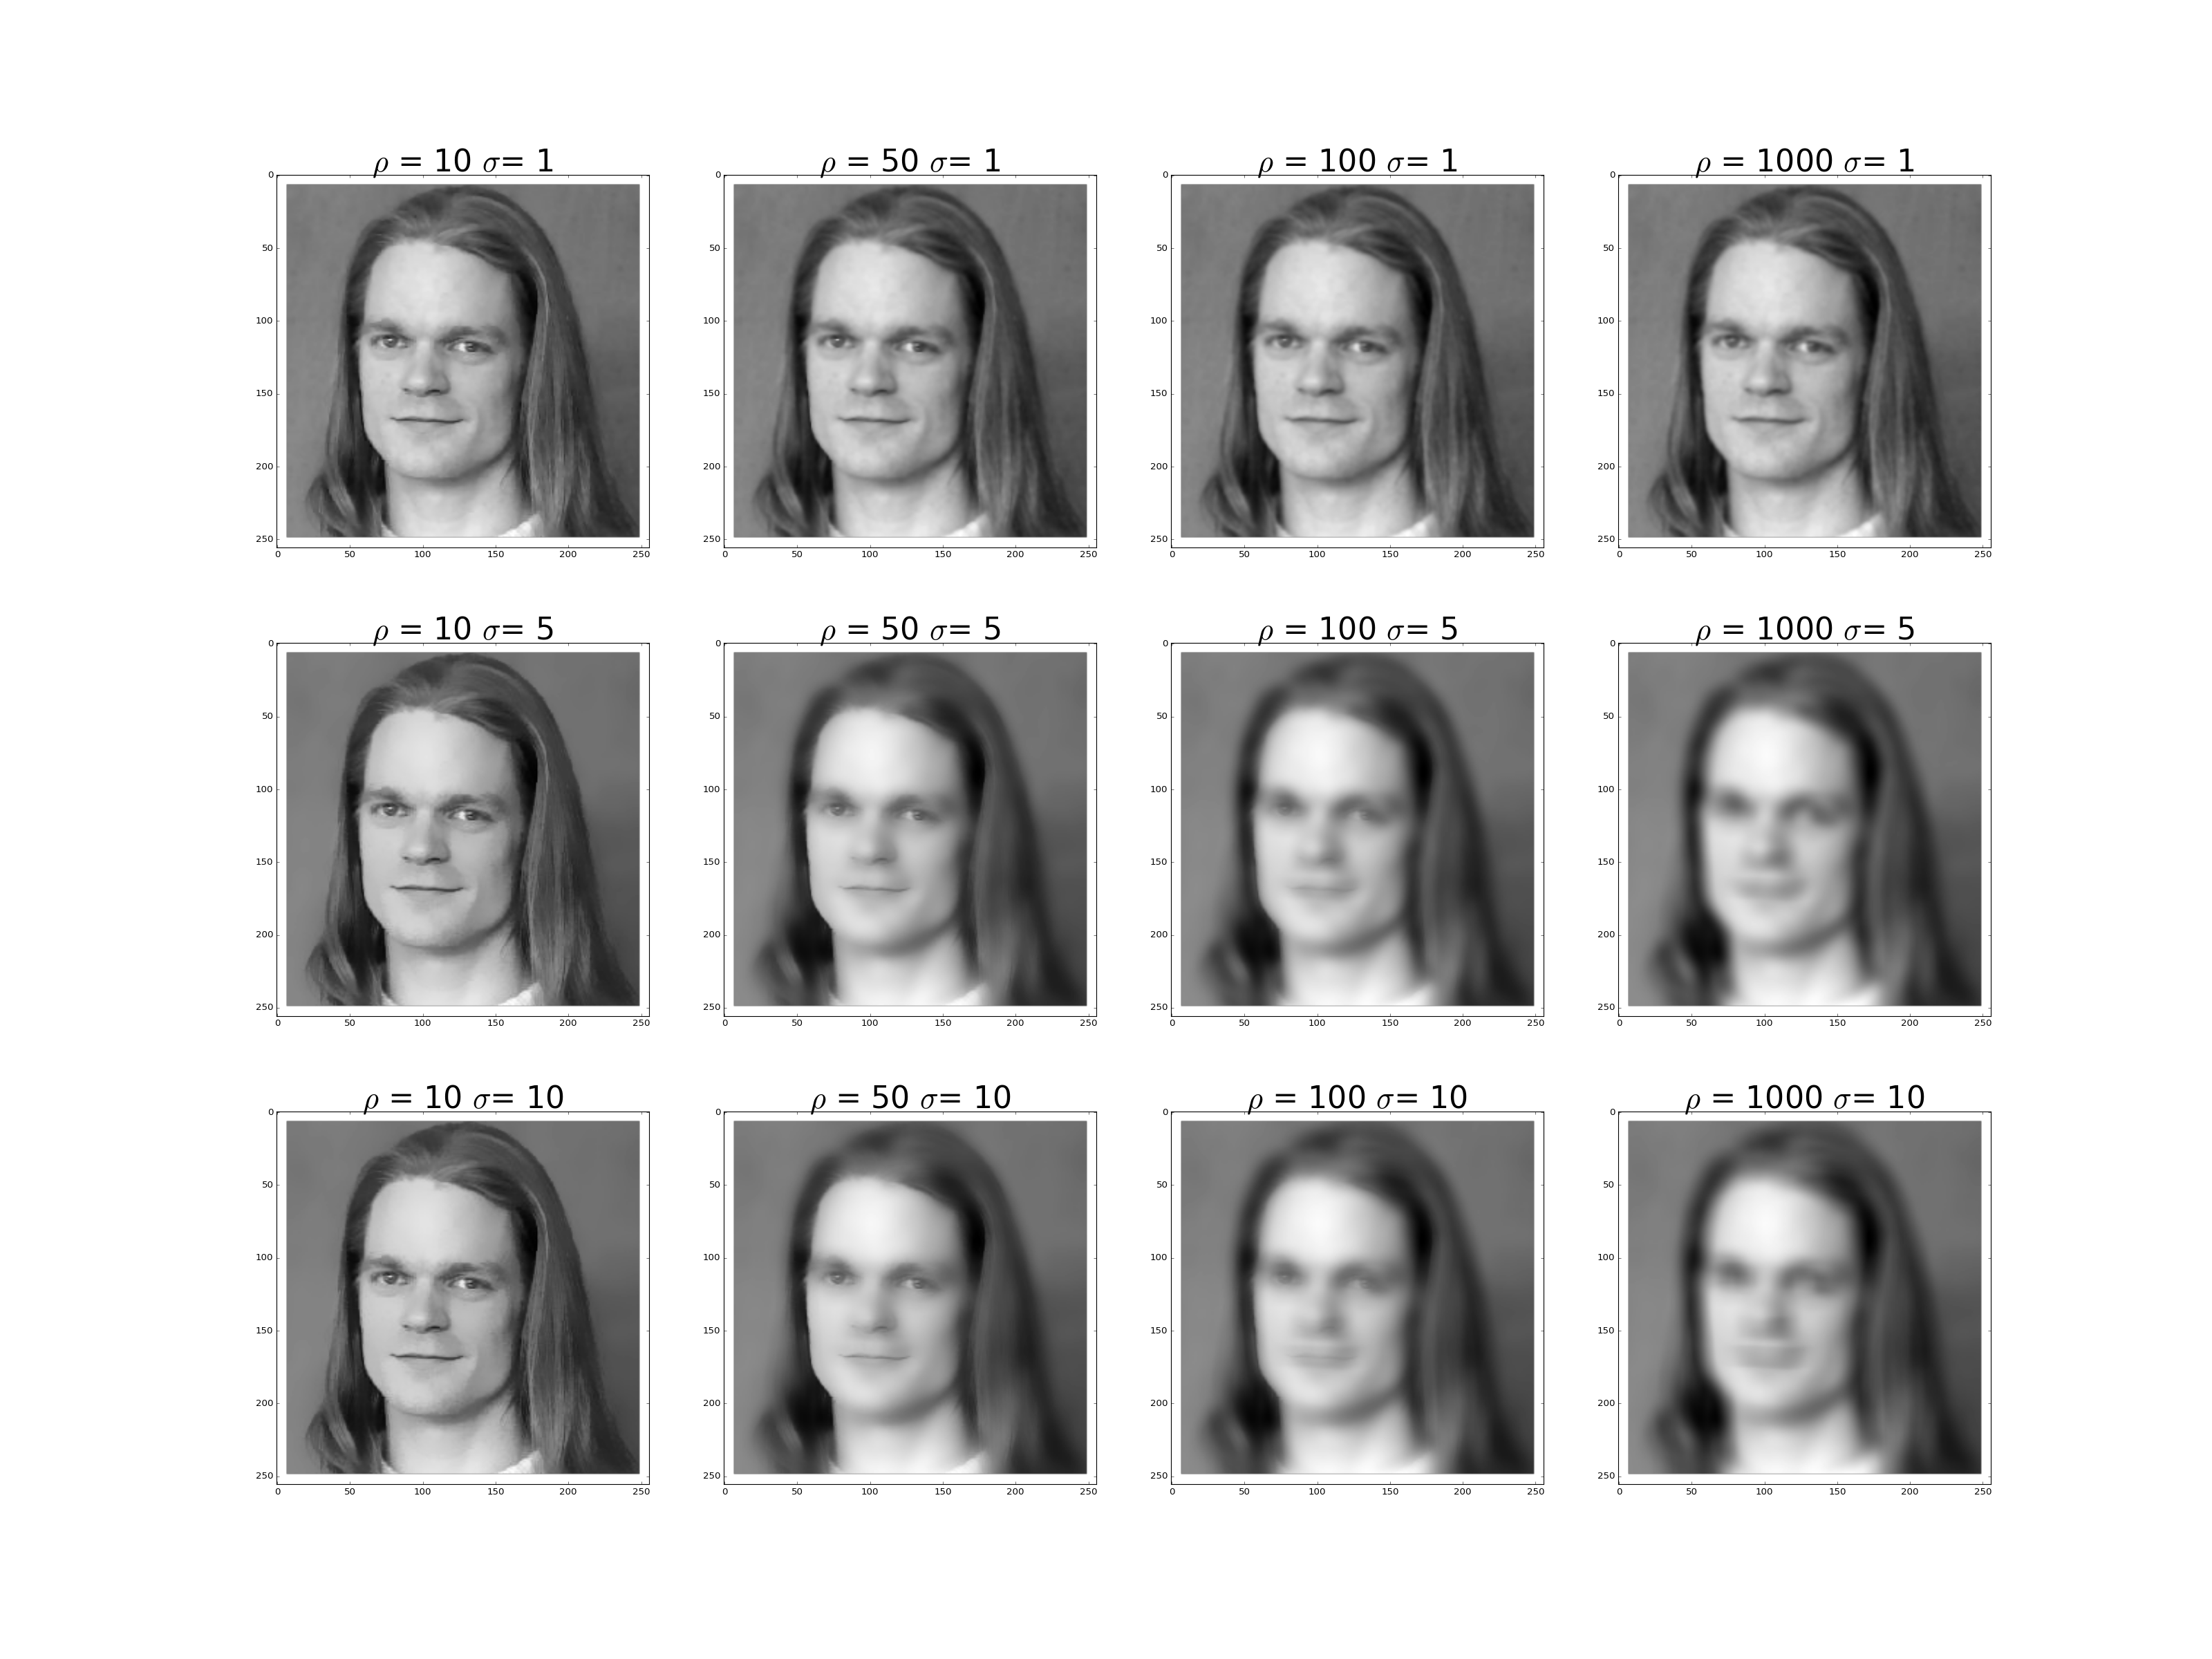

In [200]:
fig, subplots = plt.subplots(len(sigmas), len(rhos), figsize=(10*len(rhos), 10*len(sigmas)))

for i in range(len(rhos)):
    for j in range(len(sigmas)):
        subplots[j, i].set_title(r'$\rho$ = {} $\sigma$= {}'.format(rhos[i], sigmas[j]), fontsize = 40)
        subplots[j, i].imshow(new_images[(i, j)],'gray')
#fig.savefig('result_'+ image_name)

# Mechanics

In [215]:
image.shape

(256, 256)

In [219]:
kernel_size=11
max_offset= kernel_size//2
smoothing_kernel = np.empty((kernel_size, kernel_size))
for y in range(kernel_size):
    for x in range(kernel_size):
        smoothing_kernel[y, x] = (abs(x- kernel_size//2)**2 + abs(y- kernel_size//2)**2)**0.5
y=120
x=150

<IPython.core.display.Javascript object>


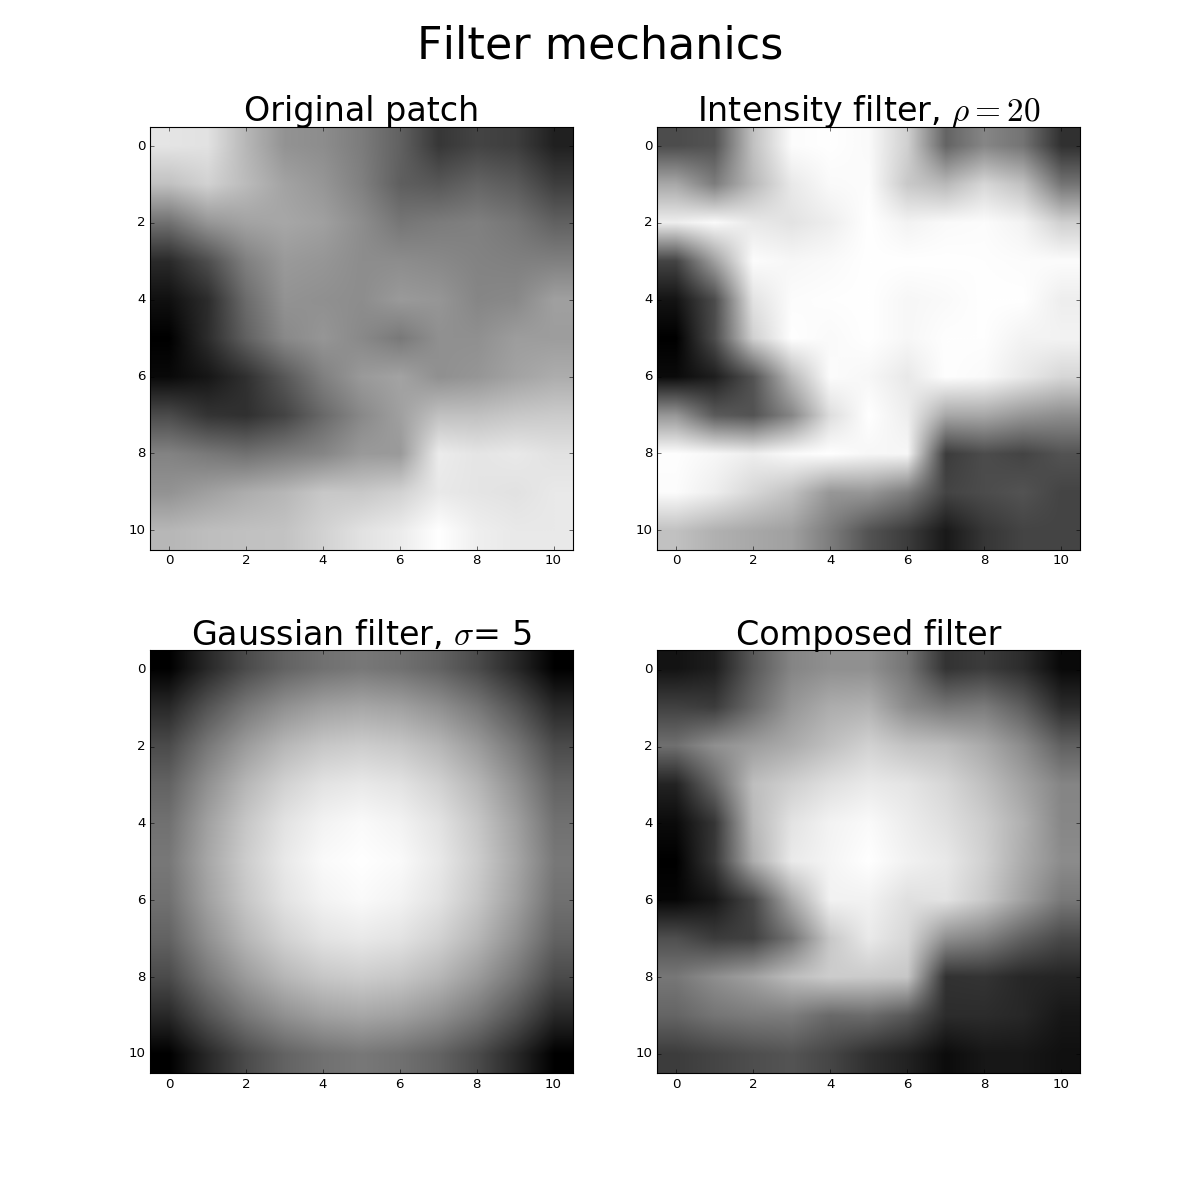

In [220]:
fig , subplots = plt.subplots(2, 2, figsize=(15, 15))
subplots[0,0].set_title('Original patch', fontsize = 30)
subplots[0,0].imshow(image[y-max_offset:y+max_offset+1,x-max_offset:x+max_offset+1], 'gray')

#subplots[0, 1].set_title('Intensity differences')
#subplots[0, 1].imshow(np.abs(image[y-max_offset:y+max_offset+1,x-max_offset:x+max_offset+1] - image[y, x]), 'gray')

subplots[0, 1].set_title(r'Intensity filter, $\rho = 20$', fontsize = 30)
subplots[0, 1].imshow(gaussian(     (image[y-max_offset:y+max_offset+1,x-max_offset:x+max_offset+1] - image[y, x]), 0, 20), 'gray')

#subplots[1, 0].set_title('Resulting intensity filter')
#subplots[1, 0].imshow(gaussian(     (image[y-max_offset:y+max_offset+1,x-max_offset:x+max_offset+1] - image[y, x]), 0, 20), 'gray')

subplots[1, 0].set_title(r'Gaussian filter, $\sigma$= 5', fontsize = 30)
subplots[1, 0].imshow(gaussian(smoothing_kernel, 0, 10), 'gray')


subplots[1, 1].set_title(r'Composed filter', fontsize = 30)
subplots[1, 1].imshow(gaussian((image[y-max_offset:y+max_offset+1,x-max_offset:x+max_offset+1] - image[y, x]), 0, 20)*gaussian(smoothing_kernel, 0, 5), 'gray')

fig.suptitle(r"Filter mechanics", fontsize = 40)
#fig.savefig('filter_mechanics.png')